In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import random
from collections import deque
from communities.algorithms import louvain_method, girvan_newman
from communities.visualization import draw_communities, louvain_animation
import warnings
warnings.filterwarnings("ignore")

In [11]:
df_node = pd.read_csv("data/node.csv")
df_node = df_node.reset_index()
df_node.rename(columns={'org_id:ID':'id'},inplace=True)
df_relation = pd.read_csv("data/relation.csv")
df_relation.rename(columns={'actor_org_id:START_ID':'START_ID',
                            'repo_org_id:END_ID':'END_ID'},inplace=True)
df_node.head()

,index,id
0,0,10017763
1,1,1004228
2,2,10049283
3,3,1009716
4,4,10119367


In [12]:
tmp1 = df_node.copy()
tmp1.rename(columns={'index':'START_index','id':'START_ID'},inplace=True)
tmp2 = df_node.copy()
tmp2.rename(columns={'index':'END_index','id':'END_ID'},inplace=True)
df_relation = pd.merge(df_relation, tmp1, how='left', on='START_ID', sort=False)
df_relation = pd.merge(df_relation, tmp2, how='left', on='END_ID', sort=False)
df_relation.head()

,START_ID,END_ID,:TYPE,START_index,END_index
0,10017763,10161,PR,0,7
1,10017763,10767217,PR,0,28
2,10017763,1342004,PR,0,123
3,10017763,1421094,PR,0,154
4,10017763,1459110,PR,0,163


In [13]:
num = len(df_node)
adj_matrix = np.zeros((num,num))
# adj_matrix.shape

for index, row in df_relation.iterrows():
    START = row["START_index"]
    END = row["END_index"]
    adj_matrix[START][END] = 1
    adj_matrix[END][START] = 1

### 小世界

大多数网络尽管规模很大但是任意两个节点间却可能有一条相当短的路径。

研究方法：

（1）一个开发者视为一个节点；

（2）若开发者a关注或被关注开发者b，即认为节点a与b间存在直接路径由a至b；

（3）随机抽取一对开发者A和B，使用搜索算法，求A至B的最短路径，作为一次采集的样本；

​		（若事先认为任意两个节点间可能有一条相当短的路径，可尝试使用BFS算法）

（4）多次随机抽取开发者对，采集一定数量的样本，研究最短路径长度的分布，计算均值等分布特种；

In [40]:
def Search(START, END, MAX_steps):
    step = 0
    queue_ = deque()
    queue_.append(START)
    while len(queue_) > 0:
        if step > MAX_steps:
            return MAX_steps
        step += 1
        length = len(queue_)
        for i in range(length):
            tmp = queue_.popleft()
            for i in range(adj_matrix.shape[1]):
                if adj_matrix[tmp][i] == 1:
                    if i == END:
                        return step
                    queue_.append(i)       

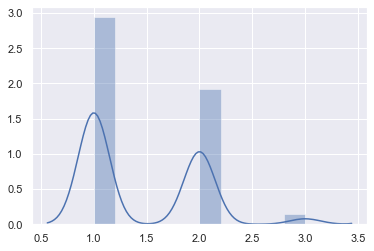

In [44]:
sum_sample = 1000
list_sample = []
for i in range(sum_sample):
    START_index = random.randint(0,adj_matrix.shape[0] - 1)
    END_index = random.randint(0,adj_matrix.shape[0] - 1)
    step = Search(START_index, END_index, MAX_steps = 6)
    list_sample.append(step)
sns.set()
sns.distplot(list_sample)

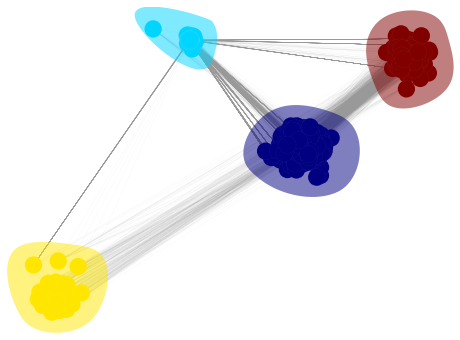

In [15]:
adj_matrix = np.zeros((num,num))

for index, row in df_relation.iterrows():
    START = row["START_index"]
    END = row["END_index"]
    adj_matrix[START][END] = 1
    
communities, frames = louvain_method(adj_matrix)
draw_communities(adj_matrix, communities)

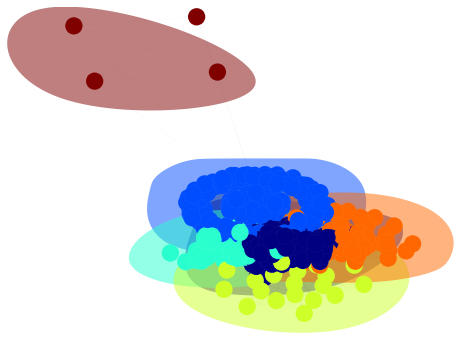

In [14]:
adj_matrix = np.zeros((num,num))

for index, row in df_relation.iterrows():
    START = row["START_index"]
    END = row["END_index"]
    adj_matrix[START][END] = 1
    adj_matrix[END][START] = 1
    
communities, frames = louvain_method(adj_matrix)
draw_communities(adj_matrix, communities)

In [18]:
#communities